<a href="https://colab.research.google.com/github/ekaekaw/klarifikasigambarUAS/blob/main/klarifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bunga2_.jpg to bunga2_.jpg
Saving bunga10.jpg to bunga10.jpg
Saving bunga9.JPG to bunga9.JPG
Saving bunga8.jpg to bunga8.jpg
Saving bunga7.jpg to bunga7.jpg
Saving bunga6.JPG to bunga6.JPG
Saving bunga5.JPG to bunga5.JPG
Saving bunga4.jpg to bunga4.jpg
Saving bunga3.jpg to bunga3.jpg
Saving bunga1.JPG to bunga1.JPG


In [ ]:
!ls /content


bunga10.jpg  bunga2_.jpg  bunga4.jpg  bunga6.JPG  bunga8.jpg  sample_data
bunga1.JPG   bunga3.jpg   bunga5.JPG  bunga7.jpg  bunga9.JPG


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Path ke gambar-gambar yang telah diunggah
image_paths = [
    '/content/bunga1.JPG',
    '/content/bunga2_.jpg',
    '/content/bunga3.jpg',
    '/content/bunga4.jpg',
    '/content/bunga5.JPG',
    '/content/bunga6.JPG',
    '/content/bunga7.jpg',
    '/content/bunga8.jpg',
    '/content/bunga9.JPG',
    '/content/bunga10.jpg',
]

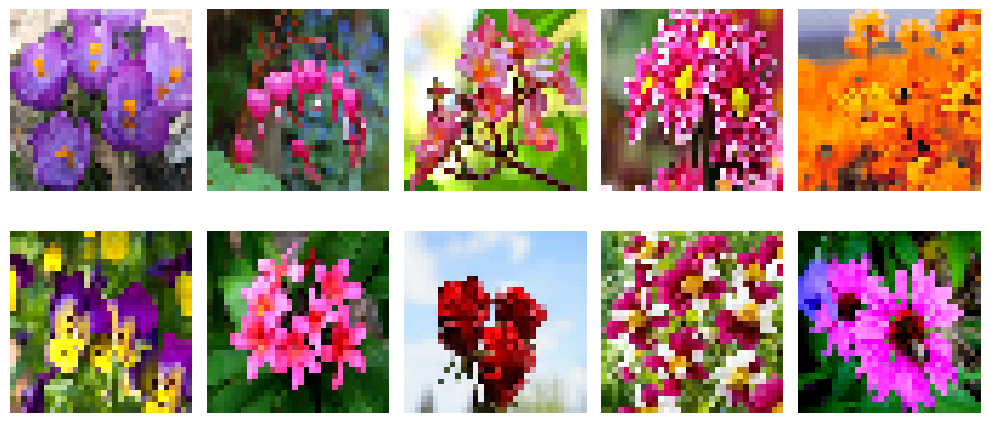

In [ ]:
# Memuat dan menampilkan gambar-gambar
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(image_paths):
    try:
        img = image.load_img(img_path, target_size=(32, 32))  # Memuat gambar dengan target ukuran 32x32 pixel
        img_array = image.img_to_array(img)  # Mengubah gambar menjadi array NumPy
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi dan ekspansi dimensi
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_array[0])  # Menampilkan gambar dari array NumPy
        plt.axis('off')  # Menyembunyikan sumbu (axis)
    except FileNotFoundError:
        print(f"File not found: {img_path}")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Path ke gambar-gambar yang telah diunggah
image_paths = [
    '/content/bunga1.JPG',
    '/content/bunga2_.jpg',
    '/content/bunga3.jpg',
    '/content/bunga4.jpg',
    '/content/bunga5.JPG',
    '/content/bunga6.JPG',
    '/content/bunga7.jpg',
    '/content/bunga8.jpg',
    '/content/bunga9.JPG',
    '/content/bunga10.jpg',
]

In [ ]:
# Label untuk gambar (misalnya, 5 gambar pertama sebagai kelas 0 dan 5 gambar berikutnya sebagai kelas 1)
labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
# Membaca dan memproses gambar
data = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(32, 32))  # Memuat gambar dengan target ukuran 32x32 pixel
    img_array = image.img_to_array(img)  # Mengubah gambar menjadi array NumPy
    img_array = img_array / 255.0  # Normalisasi
    data.append(img_array)

data = np.array(data)
labels = np.array(labels)


In [ ]:
# Membagi data menjadi set pelatihan dan validasi
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
# Mengubah label menjadi one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)


In [ ]:
# Membuat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7266 - accuracy: 0.5000 - val_loss: 0.8229 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 78ms/step - loss: 0.7480 - accuracy: 0.5000 - val_loss: 0.7156 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 83ms/step - loss: 0.6054 - accuracy: 0.7500 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 78ms/step - loss: 0.5684 - accuracy: 0.6250 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 80ms/step - loss: 0.5434 - accuracy: 0.5000 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 84ms/step - loss: 0.4772 - accuracy: 1.0000 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 0.4140 - accuracy: 1.0000 - val_loss: 0.7860 - val_accuracy: 0.0000e+00
Epoch 8/10
1/1 [=========

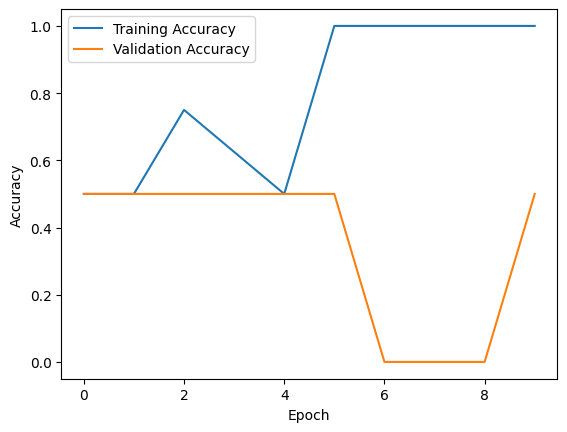

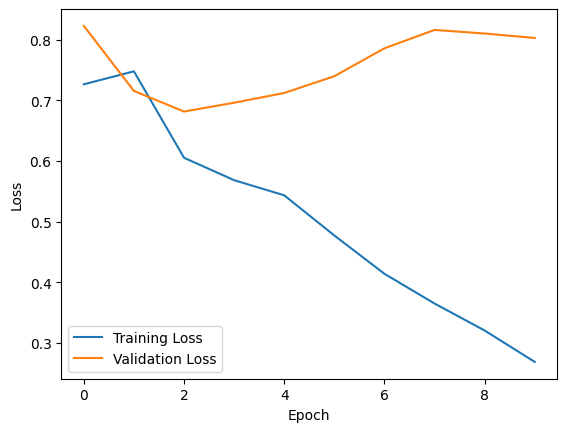

In [ ]:
# Menampilkan hasil pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()